# House Prices: Advanced Regression Techniques

## Problem Description

In [106]:
%%html
<img src='housesbanner.png',width=300,height=300>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling 
or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences 
price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges
you to predict the final price of each home.

# Exploratory Data Analysis

First we will import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

So we first check the number of rows and columns in our dataframe by using df_train.shape and df_test.shape

In [3]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


we can see that there are 1460 rows and 81 columns in our train csv file
we can see that there are 1459 rows and 80 columns in our test csv file

We can the variables type by using the command df_train.info() and df_test.info()

In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

we can see there are numerical and categorical variables in our datasets

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


we can see the first rows of our datasets by using the command df_train.head()

In [6]:
df_train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460,NaN,NaN,NaN,6.32192,2.70363,1,5,6,8,12
YrSold,1460,NaN,NaN,NaN,2007.82,1.3281,2006,2007,2008,2009,2010
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can do a statistical analysis by using the command df_train.describe() for example lets take the our target variable SalePrice
you can see that the mean is more than the median and you can see the difference between lowest value which is min and our first
Quartile which is 25% is 95075 and the difference between our maximum value max and third quartile is 54100 and you can see the
difference between the max and third quartile is more therefore our target variable is right skewed and also there are outilers
in our target variable due to the difference in mean and median

### Lets see our target variable SalePrice graphically

 ##### Histogram - Skewness and Kurtosis
 ####  Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.


Skewness: 1.882876
Kurtosis: 6.536282


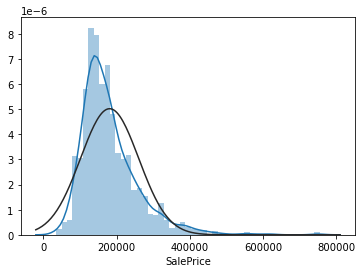

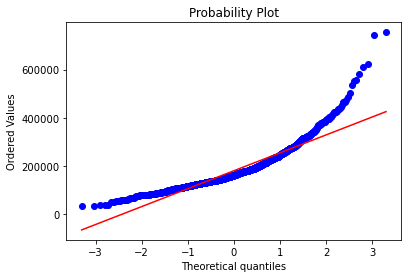

In [7]:
sns.distplot(df_train['SalePrice'],fit=norm)
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

you can see our target variable is not normally distributed we can see a positive skewness and the value of kurtosis shows that
our target variable contains extreme values at the tail and also does not follows the diagonal line.
This is not good for our ML regression model because they assume it to be normally distributed and hence it could reduce the performance
So we do a log transformation to get better results and log transformation works well with positive skewness.


Skewness: 0.121335
Kurtosis: 0.809532


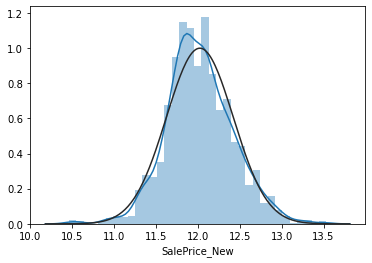

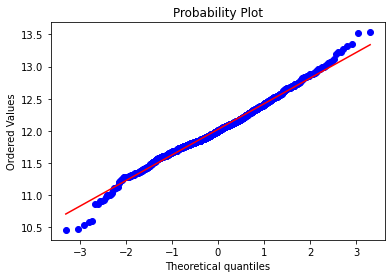

In [8]:
df_train['SalePrice_New'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice_New'],fit=norm)
print("Skewness: %f" % df_train['SalePrice_New'].skew())
print("Kurtosis: %f" % df_train['SalePrice_New'].kurt())
fig = plt.figure()
res = stats.probplot(df_train['SalePrice_New'], plot=plt)
df_train.drop('SalePrice',axis=1,inplace=True) #dropping the old column

Now you can see that we got a normally distributed graph after log transformation and it follows the diagonal line

## Numerical and Categorical features

In [9]:
numerical_features = df_train.dtypes[df_train.dtypes != 'object'].index
print('No of numerical_features is',len(numerical_features))
categorical_features = df_train.dtypes[df_train.dtypes == 'object'].index
print('No of categorical_features is',len(categorical_features))

No of numerical_features is 38
No of categorical_features is 43


In [10]:
print(df_train[numerical_features].columns)
print('-'*90)
print(df_train[categorical_features].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_New'],
      dtype='object')
------------------------------------------------------------------------------------------
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
   

In [11]:
df_train[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_New
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216


In [12]:
df_train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Missing Values

In [13]:
#missing data in train datasets
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
#missing data in test datasets
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


### We can see some of the missing values is corresponding to none so we gonna replace all the NaN values of certain features with None

In [15]:
cols1_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual'
            ,'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']

In [16]:
for col1 in cols1_none:
    df_train[col1].fillna('None',inplace=True)
    df_test[col1].fillna('None',inplace=True)

In [17]:
cols2_none = ['MSZoning','Utilities','Functional','Exterior2nd','Exterior1st','KitchenQual','SaleType']

In [18]:
for col2 in cols2_none:
    df_test[col2].fillna(df_test[col2].mode()[0],inplace=True)

In [19]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice_New,0,0.000000


In [20]:
df_train.fillna(df_train.median(),inplace=True)
df_test.fillna(df_test.median(),inplace=True)

In [21]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
SalePrice_New,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [22]:
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0],inplace=True)
df_test['Electrical'].fillna(df_test['Electrical'].mode()[0],inplace=True)

In [23]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice_New,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [24]:
# Now we gonna check the missing values in our train and test datasets
print(df_train.isnull().sum().sum())
df_test.isnull().sum().sum()

0


0

# Now we gonna check the distribution of other dimensions as we did for the target variable

In [25]:
for col in numerical_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.41     Kurtosis: 021.91
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.14
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

In [26]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df_train[numerical_features])
normal = normal.apply(test_normality)
print(not normal.any())

False


since none of the numerical features is normal we transform them too

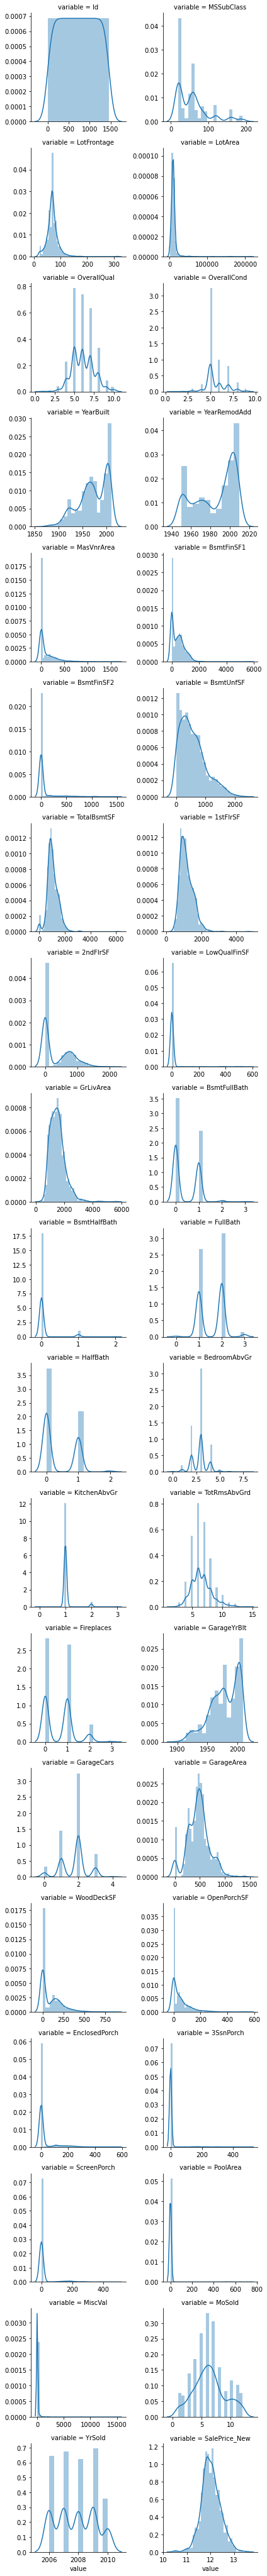

In [27]:
f = pd.melt(df_train, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Skewness: -0.137994
Kurtosis: 4.713358


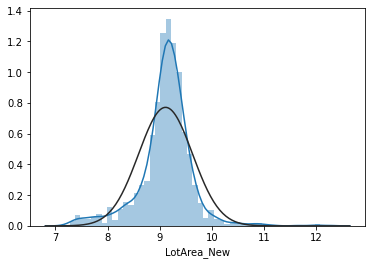

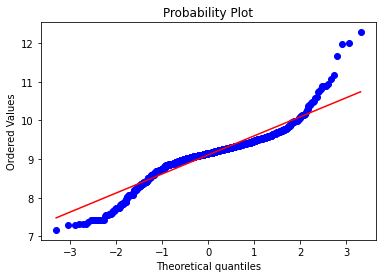

In [28]:
df_train['LotArea_New'] = np.log(df_train['LotArea'])
df_test['LotArea_New'] = np.log(df_test['LotArea'])
sns.distplot(df_train['LotArea_New'],fit=norm)
print("Skewness: %f" % df_train['LotArea_New'].skew())
print("Kurtosis: %f" % df_train['LotArea_New'].kurt())
fig = plt.figure()
res = stats.probplot(df_train['LotArea_New'], plot=plt)
df_train.drop('LotArea',axis=1,inplace=True)
df_test.drop('LotArea',axis=1,inplace=True)#dropping the old column

Skewness: 0.079157
Kurtosis: 0.150808


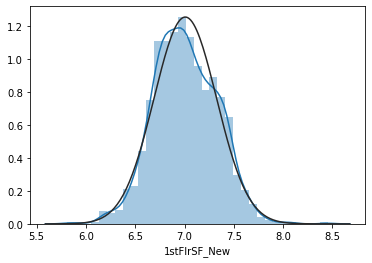

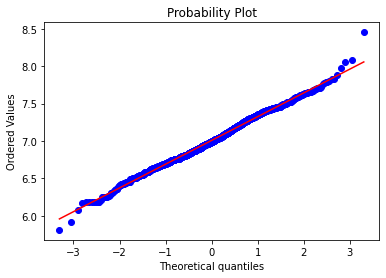

In [29]:
df_train['1stFlrSF_New'] = np.log(df_train['1stFlrSF'])
df_test['1stFlrSF_New'] = np.log(df_test['1stFlrSF'])
sns.distplot(df_train['1stFlrSF_New'],fit=norm)
print("Skewness: %f" % df_train['1stFlrSF_New'].skew())
print("Kurtosis: %f" % df_train['1stFlrSF_New'].kurt())
fig = plt.figure()
res = stats.probplot(df_train['1stFlrSF_New'], plot=plt)
df_train.drop('1stFlrSF',axis=1,inplace=True)
df_test.drop('1stFlrSF',axis=1,inplace=True)#dropping the old column

Skewness: -0.006995
Kurtosis: 0.282603


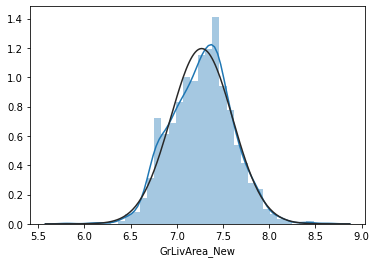

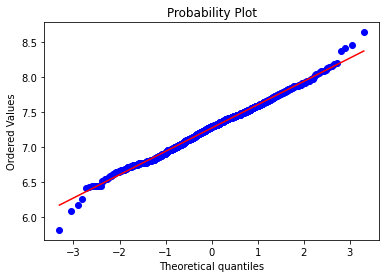

In [30]:
df_train['GrLivArea_New'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea_New'] = np.log(df_test['GrLivArea'])
sns.distplot(df_train['GrLivArea_New'],fit=norm)
print("Skewness: %f" % df_train['GrLivArea_New'].skew())
print("Kurtosis: %f" % df_train['GrLivArea_New'].kurt())
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea_New'], plot=plt)
df_train.drop('GrLivArea',axis=1,inplace=True)
df_test.drop('GrLivArea',axis=1,inplace=True)#dropping the old column

In [31]:
numerical_features = df_train.dtypes[df_train.dtypes != "object"].index

# Relation of numerical features to target variable(Bivariate Analysis)

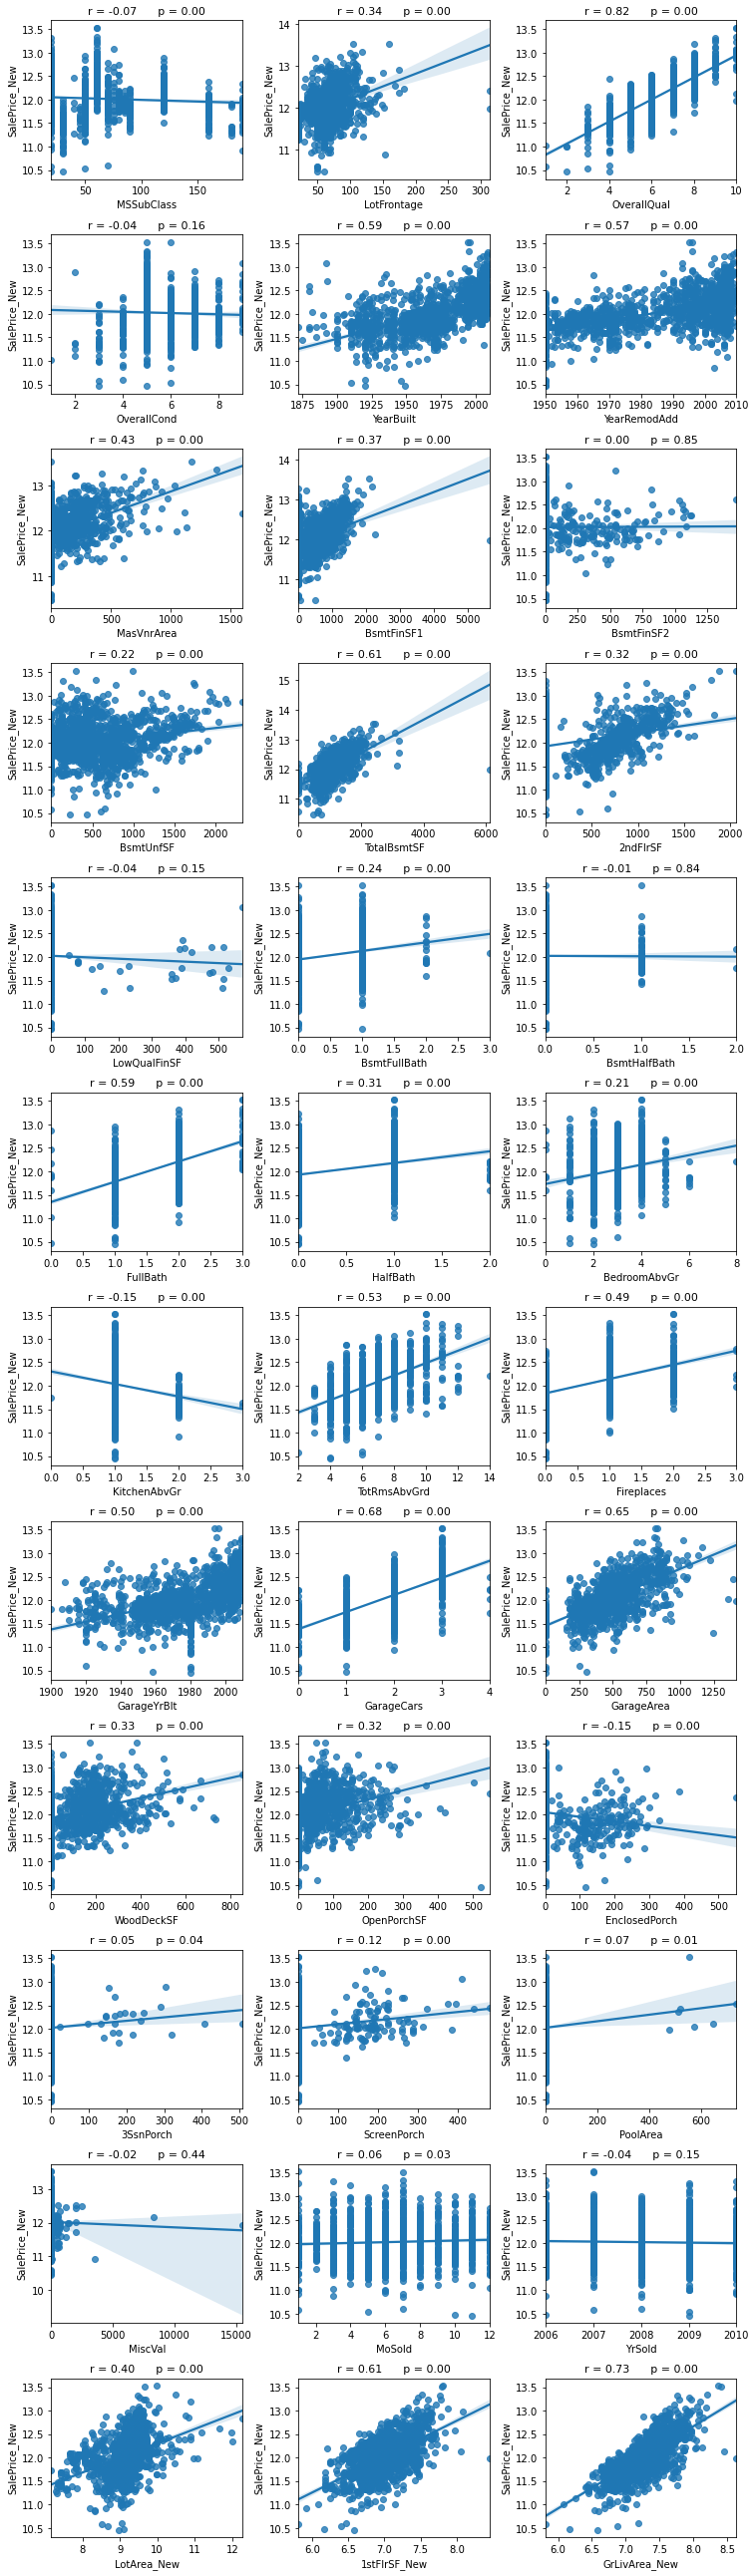

In [32]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_features)
li_not_plot = ['Id', 'SalePrice_New']
li_plot_num_feats = [c for c in list(numerical_features) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train['SalePrice_New'], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train['SalePrice_New'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   


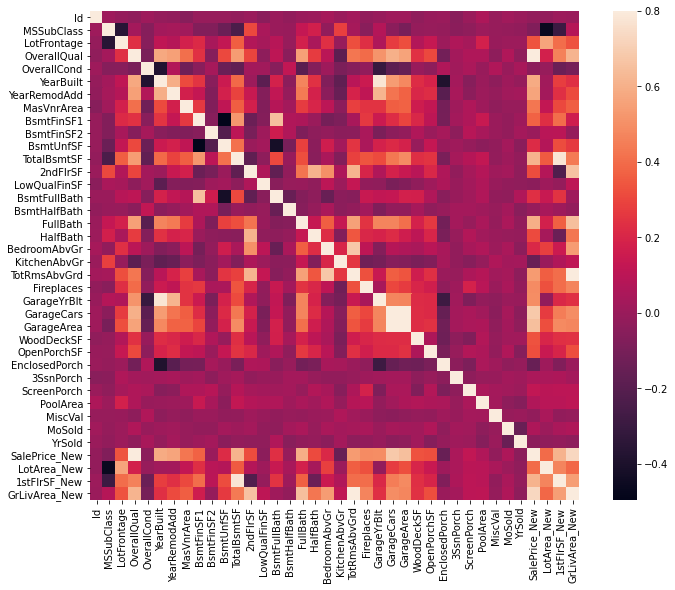

In [33]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

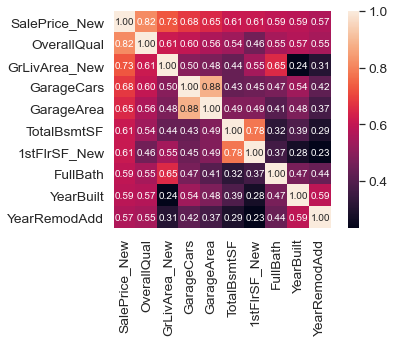

In [34]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice_New')['SalePrice_New'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Outliers

we will see all the variables which are strongly related to our target variable and handle the outliers

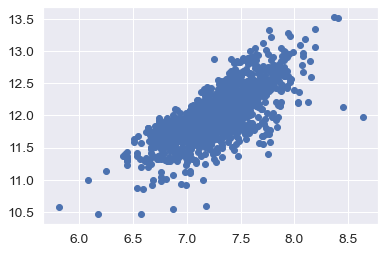

In [35]:
plt.scatter(df_train['GrLivArea_New'],df_train['SalePrice_New'])

In [36]:
df_train = df_train.drop(
    df_train[(df_train['GrLivArea_New']>8.3) & (df_train['SalePrice_New']<12.5)].index)

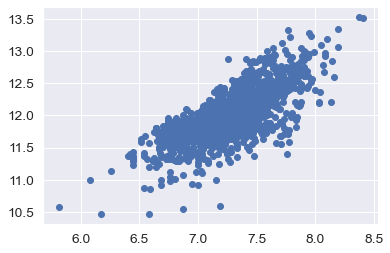

In [37]:
plt.scatter(df_train['GrLivArea_New'],df_train['SalePrice_New'])

we can see the outliers have remove which wasnt following pattern

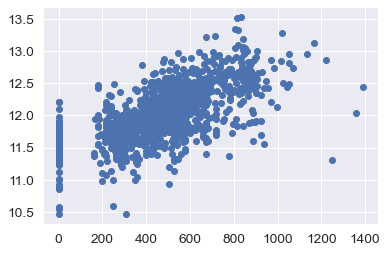

In [38]:
plt.scatter(df_train['GarageArea'],df_train['SalePrice_New'])

In [39]:
df_train = df_train.drop(
    df_train[(df_train['GarageArea']>1200) & (df_train['SalePrice_New']<12.5)].index)

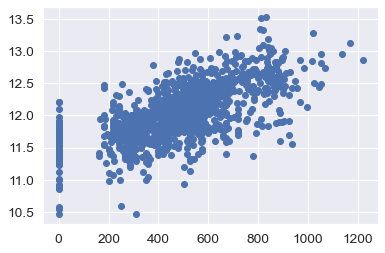

In [40]:
plt.scatter(df_train['GarageArea'],df_train['SalePrice_New'])

we can see the outliers have remove which wasnt following pattern

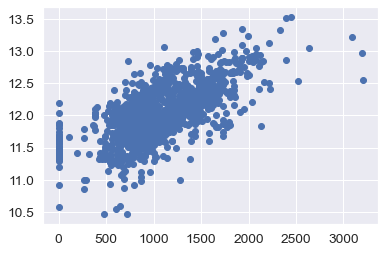

In [41]:
plt.scatter(df_train['TotalBsmtSF'],df_train['SalePrice_New'])

In [42]:
df_train = df_train.drop(df_train[df_train['TotalBsmtSF'] > 3000].index)

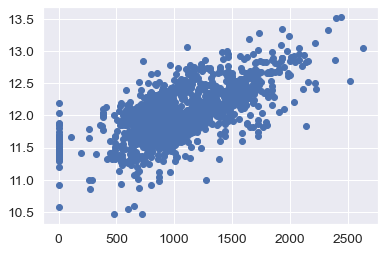

In [43]:
plt.scatter(df_train['TotalBsmtSF'],df_train['SalePrice_New'])

we can see the outliers have remove which wasnt following pattern

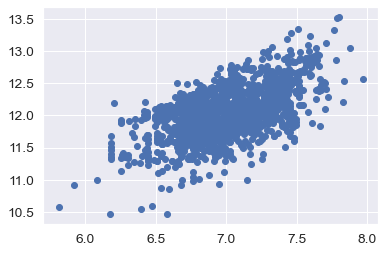

In [44]:
plt.scatter(df_train['1stFlrSF_New'],df_train['SalePrice_New'])

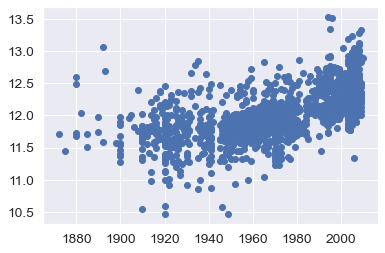

In [45]:
plt.scatter(df_train['YearBuilt'],df_train['SalePrice_New'])

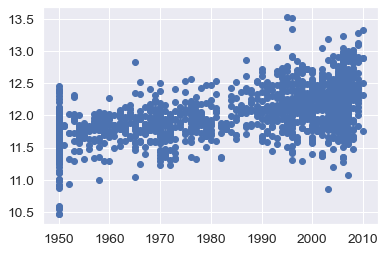

In [46]:
plt.scatter(df_train['YearRemodAdd'],df_train['SalePrice_New'])

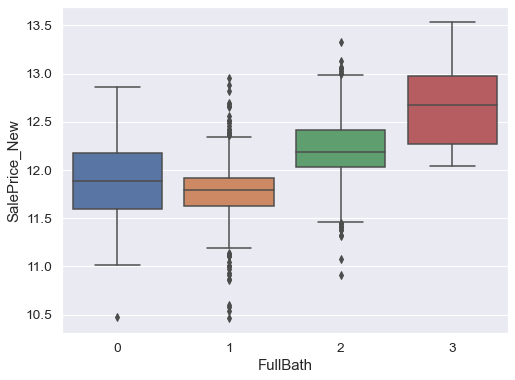

In [47]:
var = 'FullBath'
data = pd.concat([df_train['SalePrice_New'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice_New", data=data)


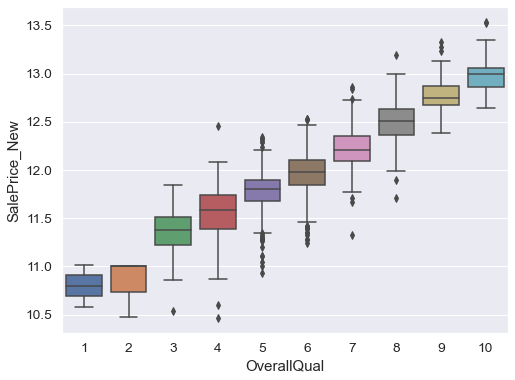

In [48]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice_New'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice_New", data=data)


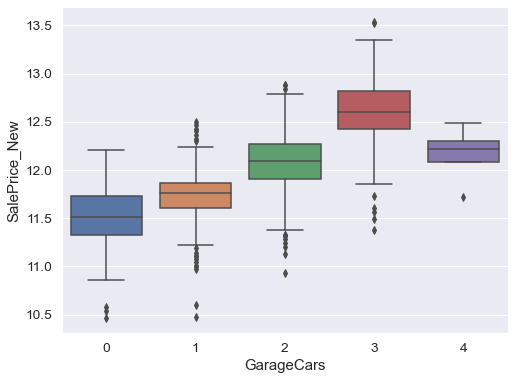

In [49]:
#box plot overallqual/saleprice
var = 'GarageCars'
data = pd.concat([df_train['SalePrice_New'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice_New", data=data)


categorical variables with their unique values

In [50]:
for catg in list(categorical_features) :
    print(df_train[catg].value_counts())
    print('#'*50)

RL         1144
RM          218
FV           65
RH           16
C (all)       9
Name: MSZoning, dtype: int64
##################################################
Pave    1447
Grvl       5
Name: Street, dtype: int64
##################################################
None    1361
Grvl      50
Pave      41
Name: Alley, dtype: int64
##################################################
Reg    921
IR1    481
IR2     41
IR3      9
Name: LotShape, dtype: int64
##################################################
Lvl    1307
Bnk      61
HLS      50
Low      34
Name: LandContour, dtype: int64
##################################################
AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64
##################################################
Inside     1045
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
##################################################
Gtl    1375
Mod      64
Sev      13
Name: LandSlope, dtype: int64
###########################

# Relation of categorical variables to target variable(SalePrice)

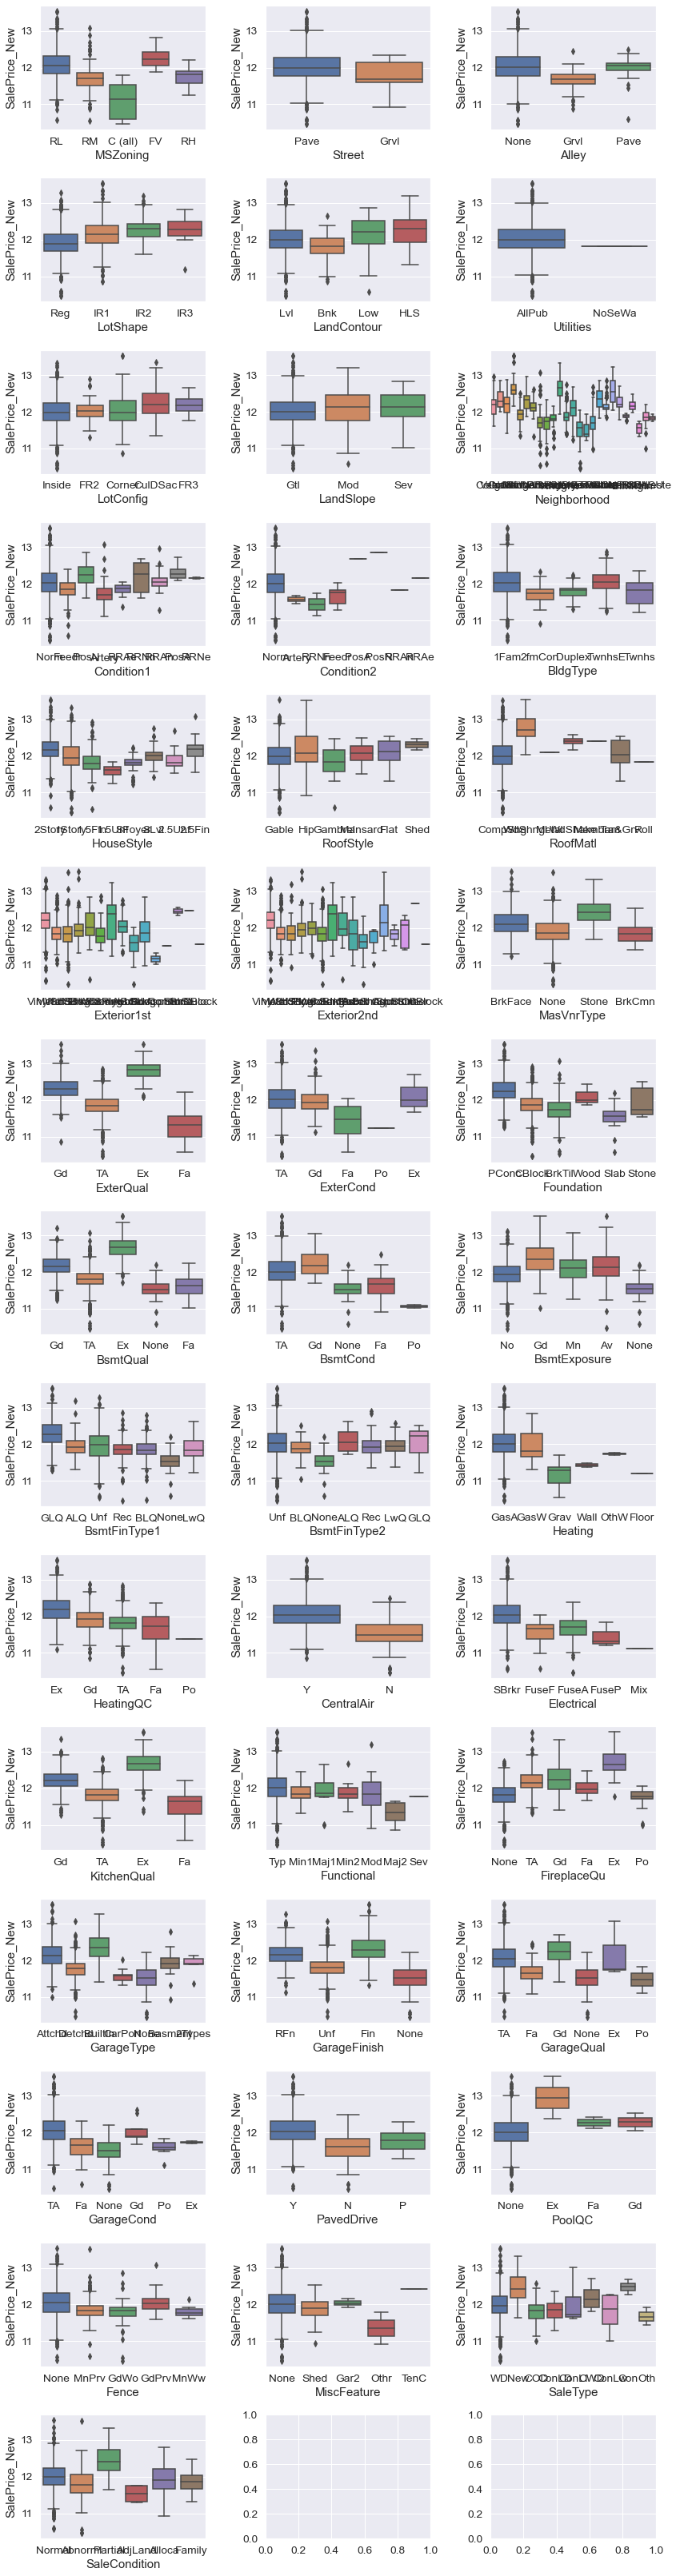

In [51]:
li_cat_feats = list(categorical_features)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y='SalePrice_New', data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

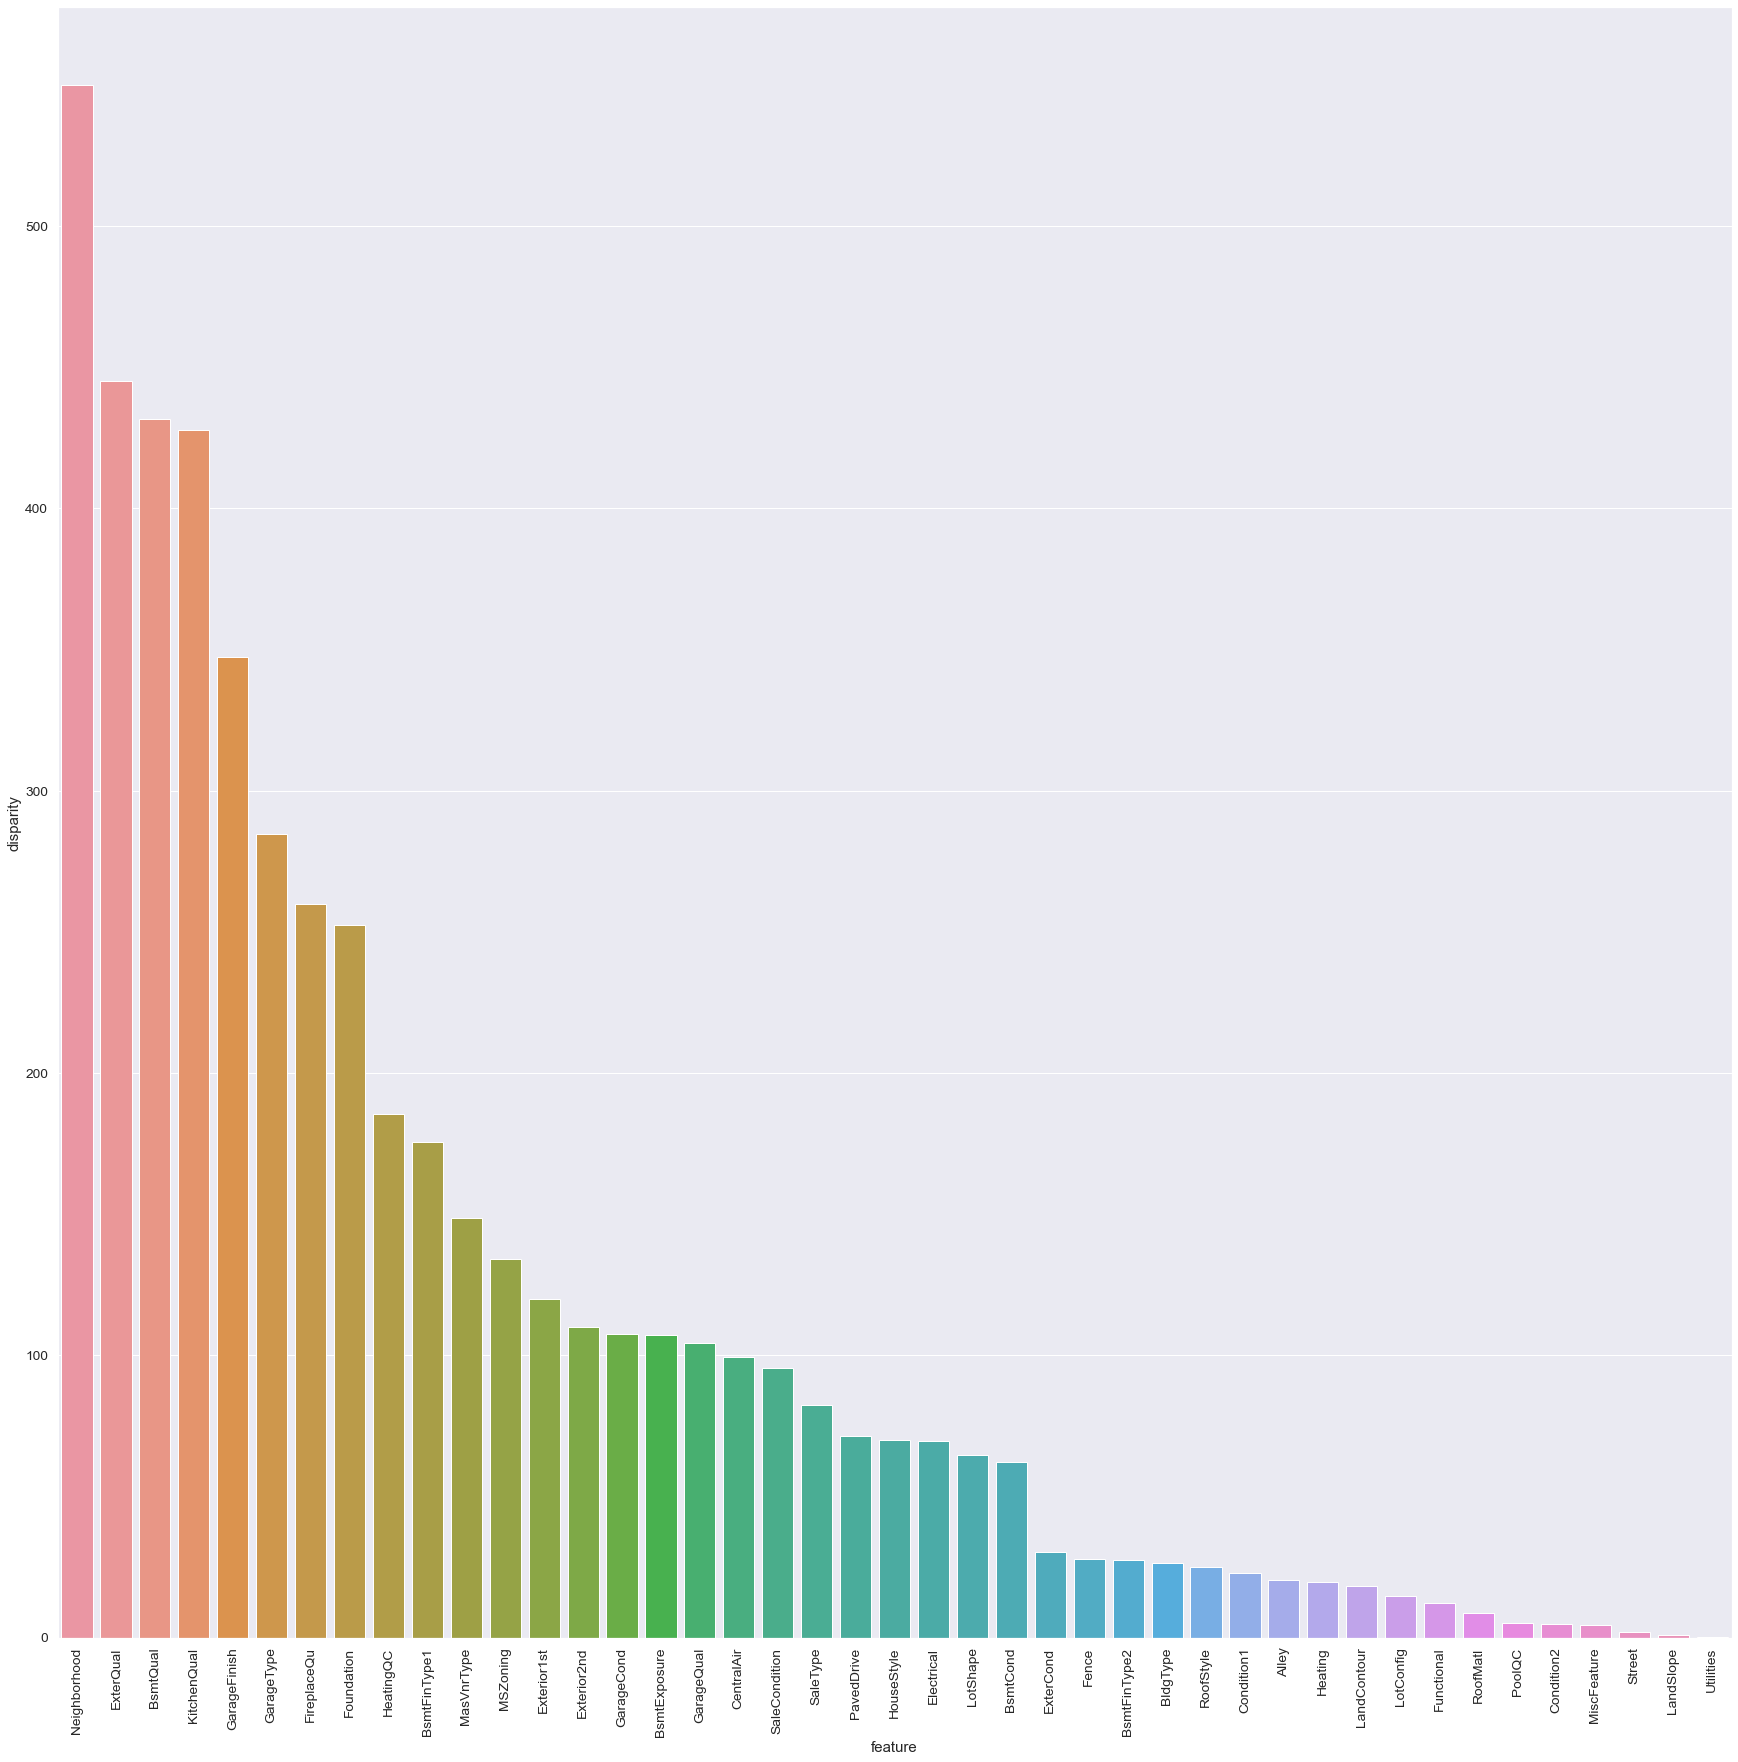

In [52]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_features
    pvals = []
    for c in categorical_features:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice_New'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)
a['disparity'] = np.log(1./a['pval'].values)
fig, ax = plt.subplots(figsize=(30,30))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)


In [53]:
strong_catg = ['Neighborhood','ExterQual','BsmtQual','KitchenQual','GarageFinish','GarageType','FireplaceQu','Foundation',
              'HeatingQC','BsmtFinType1']

In [54]:
weak_catg = ['MasVnrType','MSZoning','Exterior1st','Exterior2nd','GarageCond','BsmtExposure','GarageQual','BsmtExposure',
            'CentralAir','SaleCondition','SaleType','PavedDrive','HouseStyle','Electrical','LotShape','BsmtCond',
            'ExterCond','Fence','BsmtFinType2','BldgType','RoofStyle','Condition1','Alley','Heating','LandContour',
            'Functional','RoofMatl','PoolQC','Condition2','MiscFeature','Street','LandSlope','Utilities','LotConfig']

In [55]:
strong_num = ['SalePrice_New','OverallQual','GrLivArea_New','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF_New',
             'FullBath','YearBuilt','YearRemodAdd']

In [56]:
weak_num = ['Id','MSSubClass','LotFrontage','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF'
           ,'LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces'
           ,'GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold'
           ,'YrSold','LotArea_New']

# Now we drop all the columns weaker correlation to our target variable(SalePrice)

In [57]:
cols_to_drop = weak_catg + weak_num 
for df in [df_train,df_test]:
    df.drop(cols_to_drop,inplace=True,axis=1)

 we group the categorical varibles with respect to the median of the saleprice

In [58]:
for catg in strong_catg :
    g = df_train.groupby(catg)['SalePrice_New'].median()
    print(g)

Neighborhood
Blmngtn    12.160029
Blueste    11.826536
BrDale     11.571194
BrkSide    11.730217
ClearCr    12.207321
CollgCr    12.191967
Crawfor    12.209188
Edwards    11.691063
Gilbert    12.106252
IDOTRR     11.559192
MeadowV    11.385092
Mitchel    11.932914
NAmes      11.849398
NPkVill    11.891362
NWAmes     12.116695
NoRidge    12.597081
NridgHt    12.663492
OldTown    11.686879
SWISU      11.845820
Sawyer     11.813030
SawyerW    12.100156
Somerst    12.326073
StoneBr    12.535376
Timber     12.339180
Veenker    12.292250
Name: SalePrice_New, dtype: float64
ExterQual
Ex    12.818773
Fa    11.320554
Gd    12.301383
TA    11.845103
Name: SalePrice_New, dtype: float64
BsmtQual
Ex      12.669807
Fa      11.626254
Gd      12.165251
None    11.530765
TA      11.816727
Name: SalePrice_New, dtype: float64
KitchenQual
Ex    12.669903
Fa    11.652687
Gd    12.211060
TA    11.827736
Name: SalePrice_New, dtype: float64
GarageFinish
Fin     12.278393
None    11.512925
RFn     12.154779
Un

## Now we will convert the categorical variables to numeric variables

In [59]:
GarageT = ['2Types','Basment']

Found = ['BrkTil','Stone']

Bsm = ['BLQ','LwQ']

neig = ['SWISU','NAmes']

neig1 = ['Gilbert','SawyerW']

neig2 = ['ClearCr','Crawfor']

In [60]:
for df in [df_train,df_test]:
    
    #ExterQual
    df['ExterQual_New'] = 1
    df.loc[(df['ExterQual']=='TA'),'ExterQual_New'] = 2
    df.loc[(df['ExterQual']=='Gd'),'ExterQual_New'] = 3
    df.loc[(df['ExterQual']=='Ex'),'ExterQual_New'] = 4
    
    #BsmtQual
    df['BsmtQual_New'] = 1
    df.loc[(df['BsmtQual']=='Fa'),'BsmtQual_New'] = 2
    df.loc[(df['BsmtQual']=='TA'),'BsmtQual_New'] = 3
    df.loc[(df['BsmtQual']=='Gd'),'BsmtQual_New'] = 4
    df.loc[(df['BsmtQual']=='Ex'),'BsmtQual_New'] = 5

    
    #KitchenQual
    df['KitchenQual_New'] = 1
    df.loc[(df['KitchenQual']=='TA'),'KitchenQual_New'] = 2
    df.loc[(df['KitchenQual']=='Gd'),'KitchenQual_New'] = 3
    df.loc[(df['KitchenQual']=='Ex'),'KitchenQual_New'] = 4

    #GarageFinish
    df['GarageFinish_New'] = 1
    df.loc[(df['GarageFinish']=='Unf'),'GarageFinish_New'] = 2
    df.loc[(df['GarageFinish']=='RFn'),'GarageFinish_New'] = 3
    df.loc[(df['GarageFinish']=='Fin'),'GarageFinish_New'] = 4
    
    #GarageType
    df['GarageType_New'] = 1
    df.loc[(df['GarageType']=='Detchd'),'GarageType_New'] = 2
    df.loc[(df['GarageType'].isin(GarageT)),'GarageType_New'] = 3
    df.loc[(df['GarageType']=='Attchd'),'GarageType_New'] = 4
    df.loc[(df['GarageType']=='BuiltIn'),'GarageType_New'] = 5
    
    #FirePlaceQu
    df['FirePlaceQu_New'] = 1
    df.loc[(df['FireplaceQu']=='Po'),'FirePlaceQu_New'] = 2
    df.loc[(df['FireplaceQu']=='Fa'),'FirePlaceQu_New'] = 3
    df.loc[(df['FireplaceQu']=='TA'),'FirePlaceQu_New'] = 4
    df.loc[(df['FireplaceQu']=='Gd'),'FirePlaceQu_New'] = 5
    df.loc[(df['FireplaceQu']=='Ex'),'FirePlaceQu_New'] = 6
    
    #Foundation
    df['Foundation_New'] = 1
    df.loc[(df['Foundation'].isin(Found)),'Foundation_New'] = 2
    df.loc[(df['Foundation']=='CBlock'),'Foundation_New'] = 3
    df.loc[(df['Foundation']=='Wood'),'Foundation_New'] = 4
    df.loc[(df['Foundation']=='PConc'),'Foundation_New'] = 5
    
    #HeatingQC
    df['HeatingQC_New'] = 1
    df.loc[(df['HeatingQC']=='Fa'),'HeatingQC_New'] = 2
    df.loc[(df['HeatingQC']=='TA'),'HeatingQC_New'] = 3
    df.loc[(df['HeatingQC']=='Gd'),'HeatingQC_New'] = 4
    df.loc[(df['HeatingQC']=='Ex'),'HeatingQC_New'] = 5
    
    #BsmtFinType1
    
    df['BsmtFinType1_New'] = 1
    df.loc[(df['BsmtFinType1'].isin(Bsm)),'BsmtFinType1_New'] = 2
    df.loc[(df['BsmtFinType1']=='Rec'),'BsmtFinType1_New'] = 3
    df.loc[(df['BsmtFinType1']=='ALQ'),'BsmtFinType1_New'] = 4
    df.loc[(df['BsmtFinType1']=='Unf'),'BsmtFinType1_New'] = 5
    df.loc[(df['BsmtFinType1']=='GLQ'),'BsmtFinType1_New'] = 6
    
    #Neighborhood
    df['Neighborhood_New'] = 1
    df.loc[(df['Neighborhood']=='IDOTRR'),'Neighborhood_New'] = 2
    df.loc[(df['Neighborhood']=='BrDale'),'Neighborhood_New'] = 3
    df.loc[(df['Neighborhood']=='OldTown'),'Neighborhood_New'] = 4
    df.loc[(df['Neighborhood']=='Edwards'),'Neighborhood_New'] = 5
    df.loc[(df['Neighborhood']=='BrkSide'),'Neighborhood_New'] = 6
    df.loc[(df['Neighborhood']=='Sawyer'),'Neighborhood_New'] = 7
    df.loc[(df['Neighborhood']=='Blueste'),'Neighborhood_New'] = 8
    df.loc[(df['Neighborhood'].isin(neig)),'Neighborhood_New'] = 9
    df.loc[(df['Neighborhood']=='NPkVill'),'Neighborhood_New'] = 10
    df.loc[(df['Neighborhood']=='Mitchel'),'Neighborhood_New'] = 11
    df.loc[(df['Neighborhood'].isin(neig1)),'Neighborhood_New'] = 12
    df.loc[(df['Neighborhood']=='NWAmes'),'Neighborhood_New'] = 13
    df.loc[(df['Neighborhood']=='Blmngtn'),'Neighborhood_New'] = 14
    df.loc[(df['Neighborhood']=='CollgCr'),'Neighborhood_New'] = 15
    df.loc[(df['Neighborhood'].isin(neig2)),'Neighborhood_New'] = 16
    df.loc[(df['Neighborhood']=='Veenker'),'Neighborhood_New'] = 17
    df.loc[(df['Neighborhood']=='Somerst'),'Neighborhood_New'] = 18
    df.loc[(df['Neighborhood']=='Timber'),'Neighborhood_New'] = 19
    df.loc[(df['Neighborhood']=='StoneBr'),'Neighborhood_New'] = 20
    df.loc[(df['Neighborhood']=='NoRidge'),'Neighborhood_New'] = 21
    df.loc[(df['Neighborhood']=='NridgHt'),'Neighborhood_New'] = 22

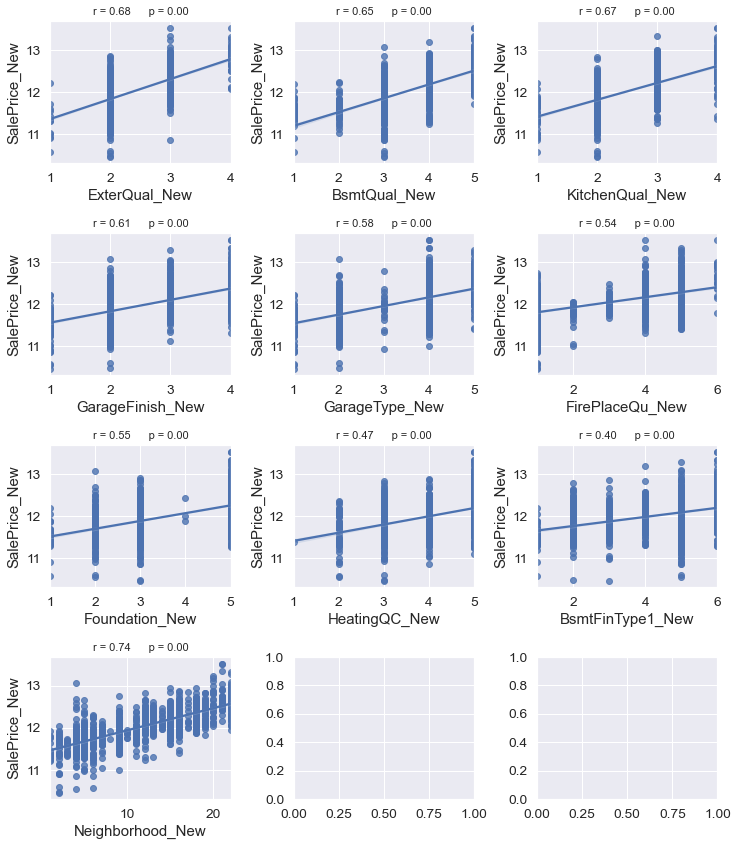

In [61]:
new_col_num = ['ExterQual_New', 'BsmtQual_New', 'KitchenQual_New','GarageFinish_New','GarageType_New','FirePlaceQu_New', 'Foundation_New',
               'HeatingQC_New', 'BsmtFinType1_New', 'Neighborhood_New']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(df_train[new_col_num[i]], df_train['SalePrice_New'], ax = axs[r][c])
            stp = stats.pearsonr(df_train[new_col_num[i]], df_train['SalePrice_New'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

we can see some of the features is highly corelated to the target variable SalePrice like neighborhood_New,ExterQual_New we drop the other features

In [62]:
for df in [df_train,df_test]:
    df.drop(strong_catg,inplace=True,axis=1)

In [63]:
drop_catg = ['GarageType_New','FirePlaceQu_New','Foundation_New','HeatingQC_New','BsmtFinType1_New']

In [64]:
for df in [df_train,df_test]:
    df.drop(drop_catg,inplace=True,axis=1)

In [65]:
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageCars,GarageArea,SalePrice_New,1stFlrSF_New,GrLivArea_New,ExterQual_New,BsmtQual_New,KitchenQual_New,GarageFinish_New,Neighborhood_New
0,7,2003,2003,856,2,2,548,12.247694,6.752270,7.444249,3,4,3,3,15
1,6,1976,1976,1262,2,2,460,12.109011,7.140453,7.140453,2,4,2,3,17
2,7,2001,2002,920,2,2,608,12.317167,6.824374,7.487734,3,4,3,3,15
3,7,1915,1970,756,1,3,642,11.849398,6.867974,7.448334,2,3,3,2,16
4,8,2000,2000,1145,2,3,836,12.429216,7.043160,7.695303,3,4,3,3,21


the features with strongly correlated to our target variable(SalePrice)

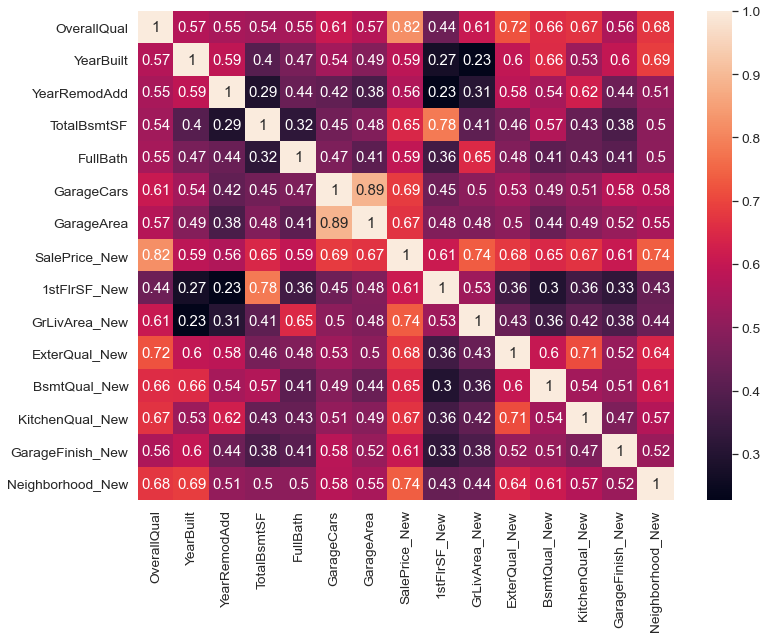

In [66]:
corr = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr,annot=True)

check for multicolinearility we can see GarageCars and GarageArea are strongly correlated to each other and we can see
1stFlrSF_New and TotalBsmtSF we gonna keep GarageCars and TotalBsmtSF and drop the other two because they are more correlated
to our target variable(SalePrice).

In [67]:
dc = ['GarageArea','1stFlrSF_New']
for df in [df_train,df_test]:
    df.drop(dc,inplace=True,axis=1)
    

In [68]:
df_train.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageCars,SalePrice_New,GrLivArea_New,ExterQual_New,BsmtQual_New,KitchenQual_New,GarageFinish_New,Neighborhood_New
0,7,2003,2003,856,2,2,12.247694,7.444249,3,4,3,3,15
1,6,1976,1976,1262,2,2,12.109011,7.140453,2,4,2,3,17
2,7,2001,2002,920,2,2,12.317167,7.487734,3,4,3,3,15
3,7,1915,1970,756,1,3,11.849398,7.448334,2,3,3,2,16
4,8,2000,2000,1145,2,3,12.429216,7.695303,3,4,3,3,21


In [69]:
new_feat = df_train.dtypes[df_train.dtypes != 'object'].index
cols = list(new_feat)
print(cols)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'SalePrice_New', 'GrLivArea_New', 'ExterQual_New', 'BsmtQual_New', 'KitchenQual_New', 'GarageFinish_New', 'Neighborhood_New']


In [70]:
feats = cols.copy()
feats.remove('SalePrice_New')

print(feats)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'GrLivArea_New', 'ExterQual_New', 'BsmtQual_New', 'KitchenQual_New', 'GarageFinish_New', 'Neighborhood_New']


In [71]:
df_train_ml = df_train[feats].copy()
df_test_ml  = df_test[feats].copy()

In [72]:
X = df_train_ml.copy()
y = df_train['SalePrice_New']
X_test = df_test_ml.copy()

# Machine Learning regression models

### we will use GridsearchCV to search the best parameters for our regression models

In [73]:
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
parameters = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}
grid = GridSearchCV(lin,parameters)


In [75]:
grid.fit(X,y)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [76]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8666759810000487
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
LinearRegression()


In [77]:
pred = grid.predict(X_test)

# Decision Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
regressor = DecisionTreeRegressor()

In [80]:
parameter = {'criterion':['mse','friedman_mse','mae'],'splitter':['best','random'],'max_leaf_nodes': list(range(2, 100)),
              'min_samples_split': [2, 3, 4]}
grid_d = GridSearchCV(regressor,parameter)                                                                                                 

In [81]:
grid_d.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

In [82]:
print(grid_d.best_score_)
print(grid_d.best_params_)
print(grid_d.best_estimator_)

0.788747506853802
{'criterion': 'friedman_mse', 'max_leaf_nodes': 69, 'min_samples_split': 2, 'splitter': 'random'}
DecisionTreeRegressor(criterion='friedman_mse', max_leaf_nodes=69,
                      splitter='random')


# KNeighborsRegressor

In [83]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
knn = KNeighborsRegressor()
param_k = {'n_neighbors':list(range(1,100)),
           'weights':['uniform','distance'],
           'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn_d = GridSearchCV(knn,param_k)
knn_d.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']})

In [85]:
print(knn_d.best_score_)
print(knn_d.best_params_)
print(knn_d.best_estimator_)

0.6186398990206012
{'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'distance'}
KNeighborsRegressor(n_neighbors=17, weights='distance')


# Lasso

In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters)
grid_lasso.fit(X, y)


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.8, 1],
                         'normalize': [True, False],
                         'tol': [1e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001]})

In [90]:
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)
print(grid_lasso.best_estimator_)

0.8664028910303321
{'alpha': 0.001, 'normalize': False, 'tol': 5e-05}
Lasso(alpha=0.001, tol=5e-05)


# Random Forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid)
grid_rf.fit(X, y)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [93]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.868350611496852
{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
RandomForestRegressor(max_depth=110, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=300)


# XGBoost Regressor

In [97]:
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,parameters)
xgb_grid.fit(X,y)


[22:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\

[22:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/

[22:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/

[22:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:25:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [99]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

0.8752931125786008
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)


we see that linear regression,lasso,random forest gave a pretty good score but the best among them was xgboost with 87.5% 
accuracy